In [2]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/mdow/Projects/HCC/Automate_figure_generate/imports.ipynb")

/cellar/users/mdow/anaconda2/lib/python2.7/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)
/cellar/users/mdow/anaconda2/lib/python2.7/site-packages/nbformat/current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


(561, 7)
y    559
n      2
Name: Cancer_census, dtype: int64


## Input: A mutation df with gene, consequences, and sample name (and maybe cohort) 
## Output: Plot scoring function for the six types

In [87]:
mouse_fname = '/cellar/users/mdow/Projects/HCC/DNA_analysis/Mouse_DNA/annotated_final_filtered_01162018.csv'
mouse = pd.read_csv(mouse_fname,index_col=0)

human_fname = '/cellar/users/mdow/Projects/HCC/DNA_analysis/Mouse_DNA/human_mut_final.pkl'
human = pd.read_pickle(human_fname)

In [88]:
human.head()

,Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,Extra,IMPACT,STRAND,SYMBOL,MODEL,SAMPLE,Species
0,LICA-CN:DO224538,1:32256570,T,ENSG00000134668,ENST00000360482,Transcript,synonymous_variant,3415,3285,1095,R,agG/agA,-,IMPACT=LOW;STRAND=-1;SYMBOL=SPOCD1;SYMBOL_SOUR...,LOW,-1,SPOCD1,LICA-CN,DO224538,Human
1,LICA-CN:DO224538,1:156084800,A,ENSG00000160789,ENST00000368300,Transcript,missense_variant,303,91,31,E/K,Gag/Aag,-,IMPACT=MODERATE;STRAND=1;SYMBOL=LMNA;SYMBOL_SO...,MODERATE,1,LMNA,LICA-CN,DO224538,Human
2,LICA-CN:DO224538,1:112525260,A,ENSG00000171385,ENST00000315987,Transcript,missense_variant,569,89,30,A/V,gCc/gTc,-,IMPACT=MODERATE;STRAND=-1;SYMBOL=KCND3;SYMBOL_...,MODERATE,-1,KCND3,LICA-CN,DO224538,Human
3,LICA-CN:DO224538,1:11561073,A,ENSG00000204624,ENST00000294484,Transcript,synonymous_variant,162,24,8,L,ttG/ttA,-,IMPACT=LOW;STRAND=1;SYMBOL=PTCHD2;SYMBOL_SOURC...,LOW,1,PTCHD2,LICA-CN,DO224538,Human
4,LICA-CN:DO224538,1:248637181,C,ENSG00000196539,ENST00000359594,Transcript,missense_variant,555,530,177,R/T,aGg/aCg,-,IMPACT=MODERATE;STRAND=1;SYMBOL=OR2T3;SYMBOL_S...,MODERATE,1,OR2T3,LICA-CN,DO224538,Human


## TCGA

In [8]:
human_tcga = pd.read_csv('/cellar/users/hcarter/projects/germline/exprs/snps/collab/TP53/mutations/LIHC/LIHC.mutect.maf',skiprows=5,sep='\t')


/cellar/users/mdow/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (118) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
human_tcga.head()

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,FILTER,CONTEXT,src_vcf_id,tumor_bam_uuid,normal_bam_uuid,case_id,GDC_FILTER,COSMIC,MC3_Overlap,GDC_Validation_Status
0,TARDBP,23435,BCM,GRCh38,chr1,11022977,11022977,+,3'UTR,SNP,...,PASS,AGTGAATTCTT,6196ea15-413d-49e0-b63e-8674412c6938,d1f202a6-a21d-4070-90ec-a0c0b56ac563,db524b2a-3200-48b5-86bf-69925a2f228f,219b067c-522f-4971-b0d0-86f9971d369d,NaN,NaN,True,Unknown
1,TNFRSF8,943,BCM,GRCh38,chr1,12125920,12125920,+,Intron,SNP,...,PASS,GCAAGGCAAAG,6196ea15-413d-49e0-b63e-8674412c6938,d1f202a6-a21d-4070-90ec-a0c0b56ac563,db524b2a-3200-48b5-86bf-69925a2f228f,219b067c-522f-4971-b0d0-86f9971d369d,NaN,NaN,True,Unknown
2,RPL11,6135,BCM,GRCh38,chr1,23693905,23693905,+,Missense_Mutation,SNP,...,PASS,AGAAGGGTCTA,6196ea15-413d-49e0-b63e-8674412c6938,d1f202a6-a21d-4070-90ec-a0c0b56ac563,db524b2a-3200-48b5-86bf-69925a2f228f,219b067c-522f-4971-b0d0-86f9971d369d,NaN,NaN,True,Unknown
3,IL22RA1,58985,BCM,GRCh38,chr1,24121599,24121599,+,Missense_Mutation,SNP,...,PASS,GGGCTCCCTGG,6196ea15-413d-49e0-b63e-8674412c6938,d1f202a6-a21d-4070-90ec-a0c0b56ac563,db524b2a-3200-48b5-86bf-69925a2f228f,219b067c-522f-4971-b0d0-86f9971d369d,NaN,NaN,True,Unknown
4,ADPRHL2,54936,BCM,GRCh38,chr1,36088901,36088901,+,5'UTR,SNP,...,PASS,TGCGCGCGGAT,6196ea15-413d-49e0-b63e-8674412c6938,d1f202a6-a21d-4070-90ec-a0c0b56ac563,db524b2a-3200-48b5-86bf-69925a2f228f,219b067c-522f-4971-b0d0-86f9971d369d,NaN,NaN,True,Unknown


In [10]:
human_tcga['MODEL'] = 'TCGA'

human_tcga['SAMPLE'] = human_tcga.Tumor_Sample_Barcode.str.split('-').str[2]

In [68]:
tcga_consq_dict = {"3'UTR":'3_prime_UTR_variant', 'Intron':'splice_region_variant,intron_variant', 'Missense_Mutation':'missense_variant', 
                   "5'UTR":'5_prime_UTR_variant', 'Silent':'synonymous_variant',
                   'Translation_Start_Site':'non_coding_transcript_exon_variant,non_coding_transcript_variant', 
                   'Nonsense_Mutation':'stop_gained', 
                   'RNA':'non_coding_transcript_exon_variant,non_coding_transcript_variant', 
                   "3'Flank":'downstream_gene_variant',
                   'Frame_Shift_Del':'frameshift_variant',
                   'Splice_Site':'splice_region_variant,intron_variant', 
                   "5'Flank":'upstream_gene_variant', 
                   'In_Frame_Del':'inframe_deletion',
                   'Splice_Region':'splice_region_variant,intron_variant', 
                   'Frame_Shift_Ins':'frameshift_variant', 
                   'In_Frame_Ins':'inframe_insertion',
                   'Nonstop_Mutation':'stop_lost', 
                   'IGR':'intergenic_variant'}

human_tcga['Consequence'] = human_tcga.Variant_Classification.map(tcga_consq_dict)

### Change into input format
#### Cols: 	MODEL	SAMPLE	SYMBOL	Consequence

In [128]:
inCols = ['MODEL','SAMPLE','SYMBOL','Consequence']

mouse_sub= mouse[inCols].drop_duplicates().reset_index(drop=True)
human_sub = human[inCols].drop_duplicates().reset_index(drop=True)

print 'Mouse'
mouse_score = get_dfScore_new(mouse_sub)
print 'Human'
human_score = get_dfScore_new(human_sub)

Mouse
(75839, 4)
75839
75839
Human
(381167, 4)
381167
381167


In [129]:
tcga_sub = human_tcga[inCols].drop_duplicates().reset_index(drop=True)
human_tcga_score = get_dfScore_new(tcga_sub)

(53543, 4)
53543
53543


In [112]:
human_score_combo = pd.concat([human_score,human_tcga_score])

In [130]:
human_score_combo.shape

(434710, 5)

In [131]:
human_score_combo.MODEL.value_counts()

LINC-JP    206815
LICA-FR    132484
TCGA        53543
LIHC-US     25902
LICA-CN     15966
Name: MODEL, dtype: int64

In [99]:
human_score_combo.to_pickle('human_tcga_icgc_mutations.pkl')

## Unstack the score functions

In [100]:
mouse_uS = mouse_score.groupby(['SAMPLE','SYMBOL']).Score.first().unstack().fillna(0)
human_uS = human_score.groupby(['SAMPLE','SYMBOL']).Score.first().unstack().fillna(0)

print human_uS.shape, mouse_uS.shape

(835, 36592) (56, 14764)


In [101]:
human_uS.to_pickle('human_mutation_score.pkl')
mouse_uS.to_pickle('mouse_mutation_score.pkl')

In [102]:
human_all_uS = human_score_combo.groupby(['SAMPLE','SYMBOL']).Score.first().unstack().fillna(0)

In [103]:
human_all_uS.to_pickle('human_tcga_icgc_mutation_score.pkl')

## A empty df to add back the samples with nothing

In [22]:
mouse_empty = mouse[['MODEL','SAMPLE']].drop_duplicates().reset_index(drop=True)

In [23]:
mouse_empty.shape

(56, 2)

## Generate a different score table from CHASM results (drivers)

In [4]:
#liver_nonViral = '/cellar/users/mdow/Projects/HCC/DNA_analysis/Mutation_codon/CHASM_output/mdow_20180130_125436/mut_VEST_input.tsv.CRAVAT_analysis.dev.mdow_20180130_125436.xls'
liver_nonViral = '/cellar/users/mdow/Projects/HCC/DNA_analysis/Mutation_codon/CHASM_output/mdow_20180208_122300/mut_VEST_input.tsv.CRAVAT_analysis.dev.mdow_20180208_122300.xls'
chasm=pd.read_excel(liver_nonViral,skiprows=11)

new_cols = newCols = [ 'Input_line', 'ID','Chromosome', 'Position', 'Strand', 'Reference_base',
'Alternate_base',  'Sample_ID', 'HUGO_symbol', 'Sequence_ontology',
'Protein_sequence_change', 'CHASM_p_value', u'CHASM_FDR','ClinVar',
'COSMIC_ID', 'COSMIC_variant_count_(tissue)', 'Number_of_samples_with_variant',
'dbSNP', 'ESP6500_AF_(average)', 'GeneCards_summary_(from_http://www.genecards.org)',
'PubMed_article_count', 'PubMed_search_term',
'gnomAD_AF_Total', 'gnomAD_AF_African',
'gnomAD_AF_American', 'gnomAD_AF_Ashkenazi_Jewish',
'gnomAD_AF_East_Asian', 'gnomAD_AF_Finnish', 'gnomAD_AF_Non_Finnish_European',
'gnomAD_AF_Other', 'gnomAD_AF_South_Asian',
'GWAS_NHLBI_Key_(GRASP)',
'GWAS_PMID_(GRASP)', 'GWAS_Phenotype_(GRASP)',
'Protein_3D_variant', 'In_TCGA_Mutation_Cluster',
'ncRNA_Class', 'ncRNA_Name', 'Pseudogene', 'Pseudogene_Transcript',
'Repeat_Class', 'Repeat_Family',
'Repeat_Name', 'TARGET', '1000_Genomes_AF', 'UTR/Intron',
'UTR/Intron_Gene', 'UTR/Intron_All_Transcript',
'VEST_p_value', 'VEST_FDR','CGL_driver_class']

chasm.columns = new_cols

In [116]:
#chasm_scores = pd.read_csv('~/Projects/HCC/DNA_analysis/Mutation_codon/mouse_driver_summary_scores.csv')

#chasm_scores = pd.read_csv('~/Projects/HCC/DNA_analysis/Mutation_codon/mouse_mutation_hg38_chasm.csv')

In [170]:
#sns.jointplot(chasm.VEST_FDR,chasm.CHASM_FDR,kind='reg')
#plt.xlabel('VEST FDR')
#plt.ylabel('CHASM FDR')

In [169]:
#sns.jointplot(chasm.VEST_FDR,chasm.CHASM_FDR,kind="kde")

## Cut threshold

In [85]:
'''thres = 0.75
m1 = chasm.VEST_FDR <= thres
m2 = chasm.CHASM_FDR <= thres

print chasm[m1].shape, chasm[m2].shape,chasm[m1|m2].shape, chasm[m1&m2].shape

chasm['Location'] = chasm.Chromosome.astype(str)+ ':'+chasm.Position.astype(str)+'-'+chasm.Position.astype(str)
chasm['Mutation'] = chasm.Chromosome.str[3:].astype(str)+ '_'+chasm.Position.astype(str)+'_'+chasm.Reference_base.astype(str)+'_'+chasm.Alternate_base.astype(str)

chasm_drivers = chasm[m2].reset_index(drop=True)'''

"thres = 0.75\nm1 = chasm.VEST_FDR <= thres\nm2 = chasm.CHASM_FDR <= thres\n\nprint chasm[m1].shape, chasm[m2].shape,chasm[m1|m2].shape, chasm[m1&m2].shape\n\nchasm['Location'] = chasm.Chromosome.astype(str)+ ':'+chasm.Position.astype(str)+'-'+chasm.Position.astype(str)\nchasm['Mutation'] = chasm.Chromosome.str[3:].astype(str)+ '_'+chasm.Position.astype(str)+'_'+chasm.Reference_base.astype(str)+'_'+chasm.Alternate_base.astype(str)\n\nchasm_drivers = chasm[m2].reset_index(drop=True)"

In [ ]:
# CHASM score of 0.35 or greater for inclusion for Figure 2. 
# This should fall into the FDR > 0.6 range but would probably cause a couple more mutations to be dropped. 
#This threshold would result in us retaining 80% of the mutations, 
#with only ~10 % of the mutations being dropped being likely functional (VEST > 0.7).

#Note: I considered all truncating and splice mutations to be functional, 
#and all silent mutations to be nonfunctional for this analysis. 
#I think we were going to include all truncating variants, and any recurrent silent mutations in Figure 2 anyway.


In [87]:
chasm_scores.head()

,MODEL,SAMPLE,SYMBOL,Mut,mouse_Consequence,mouse_Codons,mouse_AA_change,mm10_Pos,hg38_Pos,human_Mut,...,VEST_score_(stop_loss),VEST_score_(splice_site),COSMIC_variant_count,CHASM_p_value,CHASM_FDR,VEST_FDR,CGL_driver_class,ClinVar,COSMIC_ID,dbSNP
0,DEN,T19,PTPRB,G/A,missense_variant,aGc/aAc,S38N,chr10:116302166-116302166,chr12:70609281-70609281,C/A,...,NaN,NaN,NaN,0.3060,0.55,0.40,NaN,NaN,NaN,NaN
1,DEN,T34,PTPRB,A/G,missense_variant,Act/Gct,T175A,chr10:116314008-116314008,chr12:70596133-70596133,T/G,...,NaN,NaN,NaN,0.3836,0.60,0.35,NaN,NaN,NaN,NaN
2,STAM,J756T1,PTPRB,G/A,missense_variant,Gaa/Aaa,E231K,chr10:116315125-116315125,chr12:70594641-70594641,C/A,...,NaN,NaN,NaN,NaN,NaN,0.50,NaN,NaN,NaN,NaN
3,STAM,J756T3,PTPRB,C/T,missense_variant,cCt/cTt,P263L,chr10:116315222-116315222,chr12:70594544-70594544,G/T,...,NaN,NaN,NaN,0.4550,0.65,0.35,NaN,NaN,NaN,NaN
4,STAM,J757_T1_S6,PTPRB,G/A,missense_variant,Ggg/Agg,G329R,chr10:116317485-116317485,chr12:70592426-70592426,C/A,...,NaN,NaN,NaN,0.2350,0.45,0.35,NaN,NaN,NaN,NaN


In [136]:
thres = 0.75
m1 = chasm_scores.CHASM_score > thres
print chasm_scores.shape, chasm_scores[m1].shape
chasm_scores['Location'] = chasm_scores.mm10_Pos
chasm_drivers = chasm_scores[m1].reset_index(drop=True)

(1539, 33) (139, 33)


In [137]:
print chasm_drivers.shape

(139, 33)


In [90]:
#chasm_drivers.CGL_driver_class.value_counts()

#chasm_drivers[chasm_drivers.SYMBOL == 'TP53'].Location

## Orthologous mutations

In [92]:
#ortDir= '/cellar/users/mdow/Projects/HCC/DNA_analysis/Mutation_codon/'
#ort = pd.read_csv(ortDir+'mouse_hcc_mutation_ortholog.csv',index_col=0)

#print chasm_drivers.shape, ort[ort.human_mut_position.isin(chasm_drivers.human_position)].shape

In [96]:
# No need for a separate table
'''ort_driver_chasm = ort[ort.human_mut_position.isin(chasm_drivers.hg38_Pos)]
ort_driver_chasm = ort[ort.human_mut_position.isin(chasm_drivers.Location)]

print ort_driver_chasm.shape

locationToFDR = chasm_drivers.set_index(['Location'])['CHASM_FDR'].to_dict()
locationToFDR_vest = chasm_drivers.set_index(['Location'])['VEST_FDR'].to_dict()

ort_driver_chasm['CHASM_FDR']=ort_driver_chasm.human_mut_position.map(locationToFDR)
ort_driver_chasm['VEST_FDR']=ort_driver_chasm.human_mut_position.map(locationToFDR_vest)'''

"ort_driver_chasm = ort[ort.human_mut_position.isin(chasm_drivers.hg38_Pos)]\nort_driver_chasm = ort[ort.human_mut_position.isin(chasm_drivers.Location)]\n\nprint ort_driver_chasm.shape\n\nlocationToFDR = chasm_drivers.set_index(['Location'])['CHASM_FDR'].to_dict()\nlocationToFDR_vest = chasm_drivers.set_index(['Location'])['VEST_FDR'].to_dict()\n\nort_driver_chasm['CHASM_FDR']=ort_driver_chasm.human_mut_position.map(locationToFDR)\nort_driver_chasm['VEST_FDR']=ort_driver_chasm.human_mut_position.map(locationToFDR_vest)"

In [120]:
chasm_drivers.head()

,MODEL,SAMPLE,SYMBOL,Mut,mouse_Consequence,mouse_Codons,mouse_AA_change,mm10_Pos,hg38_Pos,human_Mut,...,VEST_score_(splice_site),COSMIC_variant_count,CHASM_p_value,CHASM_FDR,VEST_FDR,CGL_driver_class,ClinVar,COSMIC_ID,dbSNP,Location
0,STAM,J758T3,TNFAIP3,C/T,missense_variant,gGt/gAt,G230D,chr10:19006979-19006979,chr6:137876050-137876050,G/T,...,NaN,NaN,0.0038,0.15,0.1,TSG,NaN,NaN,NaN,chr10:19006979-19006979
1,DEN,T89,TNFAIP3,G/T,missense_variant,cCa/cAa,P26Q,chr10:19011699-19011699,chr6:137871304-137871304,C/T,...,NaN,NaN,0.0060,0.15,0.1,TSG,NaN,NaN,NaN,chr10:19011699-19011699
2,STAM,J759T4,PRDM1,G/A,missense_variant,Cca/Tca,P82S,chr10:44456669-44456669,chr6:106088408-106088408,C/A,...,NaN,1.0,0.0102,0.15,0.1,TSG,NaN,COSM97170,NaN,chr10:44456669-44456669
3,DEN,T62,STK11,T/A,missense_variant,cTg/cAg,L140Q,chr10:80125523-80125523,chr19:1219368-1219368,T/A,...,NaN,NaN,0.0002,0.05,0.1,TSG,NaN,NaN,NaN,chr10:80125523-80125523
4,STAM,J756T8,STK11,G/A,missense_variant,gGc/gAc,G163D,chr10:80126056-80126056,chr19:1220396-1220396,G/A,...,NaN,1.0,0.0000,0.05,0.1,TSG,Pathogenic,COSM21352,rs137853078,chr10:80126056-80126056


In [138]:
chasm_drivers['Location'] = chasm_drivers.mm10_Pos.str[3:]

### This needs cleaning up...

In [139]:
mouse_chasm = mouse[mouse.Location.isin(chasm_drivers.mm10_Pos.str[3:])]
print mouse_chasm.shape
#mouse[mouse.Uploaded_variation.isin(chasm.Mutation)].shape

#mouseToHumanPos = ort_driver_chasm.set_index(['mouse_mut_position'])['human_mut_position'].to_dict()


(139, 39)


In [140]:
locationToFDR = chasm_drivers.set_index(['Location'])['CHASM_FDR'].to_dict()
locationToFDR_vest = chasm_drivers.set_index(['Location'])['VEST_FDR'].to_dict()

In [141]:

mouse_chasm['mouse_mut_position'] = 'chr'+mouse_chasm.Location

#mouse_chasm['CHASM_FDR'] = mouse_chasm.mouse_mut_position.map(mouseToHumanPos).map(locationToFDR)
#mouse_chasm['VEST_FDR'] = mouse_chasm.mouse_mut_position.map(mouseToHumanPos).map(locationToFDR_vest)

mouse_chasm['CHASM_FDR'] = mouse_chasm.Location.map(locationToFDR)
mouse_chasm['VEST_FDR'] = mouse_chasm.Location.map(locationToFDR_vest)


mouse_chasm_S = mouse_chasm[['MODEL','SAMPLE','SYMBOL','CHASM_FDR','VEST_FDR']].drop_duplicates().reset_index(drop=True)

mouse_chasm_merged = pd.merge(mouse_empty,mouse_chasm_S,how='left').fillna(1)

mouse_chasm_merged.SAMPLE.nunique()

mouse_chasm_uS = mouse_chasm_merged.groupby(['SAMPLE','SYMBOL']).CHASM_FDR.first().unstack().fillna(1)
mouse_vest_uS = mouse_chasm_merged.groupby(['SAMPLE','SYMBOL']).VEST_FDR.first().unstack().fillna(1)

mouse_chasm_uS.shape, mouse_vest_uS.shape

/cellar/users/mdow/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/cellar/users/mdow/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/cellar/users/mdow/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

((56, 57), (56, 57))

In [142]:
mouse_chasm_uS.to_pickle('mouse_chasm_fdr_score.pkl')
mouse_vest_uS.to_pickle('mouse_vest_fdr_score.pkl')

In [143]:
inCols = ['MODEL','SAMPLE','SYMBOL','Consequence']

mouse_sub= mouse_chasm[inCols].drop_duplicates().reset_index(drop=True)

print 'Mouse'
mouse_score = get_dfScore_new(mouse_sub)

mouse_merged = pd.merge(mouse_empty,mouse_score,how='left').fillna(0)

print mouse_merged.SAMPLE.nunique()

mouse_uS = mouse_merged.groupby(['SAMPLE','SYMBOL']).Score.first().unstack().fillna(0)

print mouse_uS.shape

mouse_uS.to_pickle('mouse_chasm_mutation_score.pkl')

Mouse
(133, 4)
133
133
56
(56, 57)


In [144]:
mouse_uS.columns

Index([         0,    u'ABL1',     u'ALK',  u'ARID1B',   u'ARID2',     u'ATM',
          u'BCOR',    u'BRAF',   u'BRCA1',   u'BRCA2',     u'BTK',     u'CBL',
         u'CDK12',  u'CDKN2A',  u'CREBBP',  u'CTNNB1',    u'CYLD',    u'DDR2',
          u'EGFR',   u'ERBB2',   u'FGFR2',   u'FGFR4',    u'FLT3',    u'HRAS',
         u'KAT6A',   u'KDM6A',     u'KDR',   u'KMT2C',    u'KRAS',  u'MAP2K4',
       u'MAP3K13',   u'MED12',    u'MITF',    u'MLH1',    u'MSH2',    u'MSH6',
          u'MTOR',   u'NCOR1',     u'NF2',    u'NRAS',  u'PDGFRA',  u'PIK3CA',
         u'PRDM1',   u'PTCH1',    u'PTEN',   u'PTPRT',     u'RET',   u'SF3B1',
       u'SMARCA4',     u'SMO',     u'SRC',   u'STAT3',   u'STK11', u'TNFAIP3',
          u'TP63',   u'TRRAP',    u'TSC2'],
      dtype='object', name=u'SYMBOL')

In [145]:
mouse_merged.shape

(151, 5)

In [146]:
mouse_merged.Score.value_counts()

4.0    131
0.0     18
3.0      2
Name: Score, dtype: int64

In [147]:
mouse_merged.Score.value_counts()

4.0    131
0.0     18
3.0      2
Name: Score, dtype: int64

In [37]:
'''test = pd.read_csv('cut_FDR_scores')

test['Mut_mis'] = test.SAMPLE.astype(str) + '-' + test.SYMBOL.astype(str) + '-' + test.Consequence.astype(str)  + '-' + test.Score.astype(str)

mouse_merged['Mut_mis'] = mouse_merged.SAMPLE.astype(str) + '-' + mouse_merged.SYMBOL.astype(str) + '-' + mouse_merged.Consequence.astype(str)  + '-' + mouse_merged.Score.astype(str)'''

## Add back the non-missense mutations

In [223]:
mouse_uS_all = pd.read_pickle('mouse_mutation_score.pkl')

mouse_sub = mouse_uS_all#.loc[:,mouse_uS_all.columns.isin(mouse_merged.SYMBOL.tolist())]#mouse_uS.shape, mouse_uS_all.shape
mouse_sub = mouse_sub.stack().reset_index(name='Score')

mouse_nonMis = mouse_sub[~mouse_sub.Score.isin([0,4])].reset_index(drop=True)

mouse_nonMis['Consequence'] = 'Non-missense'

mouse_add = pd.concat([mouse_merged,mouse_nonMis])

mouse_add.shape, mouse_merged.shape, mouse_nonMis.shape

((4927, 5), (151, 5), (4776, 4))

In [224]:
mouse_add.Consequence.unique()

array(['missense_variant', 0, 'stop_gained',
       'missense_variant,splice_region_variant', 'Non-missense'], dtype=object)

In [225]:
mouse_add.head()

,Consequence,MODEL,SAMPLE,SYMBOL,Score
0,missense_variant,DEN,T19,TSC2,4.0
1,missense_variant,DEN,T19,PTEN,4.0
2,missense_variant,DEN,T19,BRAF,4.0
3,missense_variant,DEN,T20,MSH6,4.0
4,missense_variant,DEN,T20,BRAF,4.0


In [226]:
# BRAF in STAM is a splice and missense at J750_T1_S2
m1 = mouse_add.SYMBOL == 'BRAF'
m2 = mouse_add.MODEL == 'STAM'

tmp_dict = {'Consequence':'splice_region_variant','MODEL':'STAM','SAMPLE':'J750_T1_S2','SYMBOL':'BRAF','Score':2}
tmp = pd.DataFrame([tmp_dict.values()], columns=tmp_dict.keys())

In [227]:
tmp

,Consequence,SAMPLE,MODEL,Score,SYMBOL
0,splice_region_variant,J750_T1_S2,STAM,2,BRAF


In [164]:
mouse_add2 = pd.concat([mouse_add,tmp])

In [166]:
mouse_add.shape, mouse_add2.shape

((183, 5), (184, 5))

In [167]:
mouse_uS_add = mouse_add.groupby(['SAMPLE','SYMBOL']).Score.first().unstack().fillna(0)

print mouse_uS_add.shape

mouse_uS_add.to_pickle('mouse_chasm_mutation_more_score.pkl')

(56, 57)


In [175]:
mouse_uS_add.head()

SYMBOL,0,ABL1,ALK,ARID1B,ARID2,ATM,BCOR,BRAF,BRCA1,BRCA2,...,SF3B1,SMARCA4,SMO,SRC,STAT3,STK11,TNFAIP3,TP63,TRRAP,TSC2
SAMPLE,,,,,,,,,,,,,,,,,,,,,
AT136T1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT136T2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT136T3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT66T1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Clean out some of the recurrent synonymous

In [249]:
#!!! The synonymous mutations in J759T2, J759T4, J759T5 look like artifacts
m1 = mouse_nonMis.Score == 1
m2 = mouse_nonMis.SAMPLE.str.contains('J759')
m3 = mouse_nonMis.SYMBOL.str.contains('^ARID2|KMT2A|KDM6A')

mouse_nonMis[(m1&m2&m3)].sort_values(['SAMPLE'])

,SAMPLE,SYMBOL,Score,Consequence
2441,J759T2,ARID2,1.0,Non-missense
2582,J759T2,KDM6A,1.0,Non-missense
2584,J759T2,KMT2A,1.0,Non-missense
2824,J759T4,ARID2,1.0,Non-missense
2952,J759T4,KDM6A,1.0,Non-missense
2955,J759T4,KMT2A,1.0,Non-missense
3203,J759T5,ARID2,1.0,Non-missense
3332,J759T5,KDM6A,1.0,Non-missense
3334,J759T5,KMT2A,1.0,Non-missense


In [268]:
m1 = mouse_nonMis.Score == 1
m2 = mouse_nonMis.SAMPLE.isin(['J758T3','J759T2','J759T4','J759T5'])
m3 = mouse_nonMis.SYMBOL.str.contains('^ARID2|KMT2A|KDM6A|NCOR')

mouse_nonMis[(m1&m2&m3)].sort_values(['SYMBOL'])

,SAMPLE,SYMBOL,Score,Consequence
1836,J758T3,ARID2,1.0,Non-missense
2441,J759T2,ARID2,1.0,Non-missense
2824,J759T4,ARID2,1.0,Non-missense
3203,J759T5,ARID2,1.0,Non-missense
1974,J758T3,KDM6A,1.0,Non-missense
2582,J759T2,KDM6A,1.0,Non-missense
2952,J759T4,KDM6A,1.0,Non-missense
3332,J759T5,KDM6A,1.0,Non-missense
2584,J759T2,KMT2A,1.0,Non-missense
2955,J759T4,KMT2A,1.0,Non-missense


In [269]:
mouse_nonMis_2 = mouse_nonMis[~(m1&m2&m3)]

In [261]:
'''m1 = mouse.SYMBOL.str.contains('^ARID2|KMT2A|KDM6A')
m2 = mouse.Consequence.str.contains('synonymous')
m3 = mouse.SAMPLE.isin(['J758T3','J759T2','J759T4','J759T5'])
mouse[(m1&m2&m3)].sort_values(['Location'])'''

"m1 = mouse.SYMBOL.str.contains('^ARID2|KMT2A|KDM6A')\nm2 = mouse.Consequence.str.contains('synonymous')\nm3 = mouse.SAMPLE.isin(['J758T3','J759T2','J759T4','J759T5'])\nmouse[(m1&m2&m3)].sort_values(['Location'])"

## =======

## Already cut by threshold and used for alteration plots

In [177]:
chasm_allMatch = pd.read_pickle('/cellar/users/mdow/Projects/HCC/DNA_analysis/Pathway_alteration/mouse_mut_chasm_filtered_allMatch.pkl')

In [178]:
chasm_genMatch= pd.read_pickle('/cellar/users/mdow/Projects/HCC/DNA_analysis/Pathway_alteration/mouse_mut_chasm_filtered_genMatch.pkl')

In [179]:
print chasm_allMatch.shape, chasm_genMatch.shape

(351, 41) (327, 41)


In [270]:
def get_score_df_uS(df):
    inCols = ['MODEL','SAMPLE','SYMBOL','Consequence']

    df_sub = df[inCols].drop_duplicates().reset_index(drop=True)

    print 'Mouse'
    df_score = get_dfScore_new(df_sub)

    mouse_merged = pd.merge(mouse_empty,df_score,how='left').fillna(0)

    print mouse_merged.SAMPLE.nunique()
    
    # add non-missense !!!
    print mouse_nonMis.shape, tmp.shape
    
    mouse_toAdd = pd.concat([mouse_nonMis_2,tmp])
    
    mouse_merged_more = pd.concat([mouse_merged,mouse_toAdd])
    
    print mouse_merged.shape, mouse_toAdd.shape, mouse_merged_more.shape

    mouse_uS = mouse_merged_more.groupby(['SAMPLE','SYMBOL']).Score.first().unstack().fillna(0)

    print mouse_uS.shape
    return mouse_uS

In [271]:
chasm_allMatch_uS = get_score_df_uS(chasm_allMatch)

chasm_allMatch_uS.to_pickle('mouse_chasm_allMatch_mut_score.pkl')

Mouse
(335, 4)
335
335
56
(4776, 4) (1, 5)
(350, 5) (4765, 5) (5115, 5)
(56, 3001)


In [272]:
chasm_genMatch_uS = get_score_df_uS(chasm_genMatch)

chasm_genMatch_uS.to_pickle('mouse_chasm_genMatch_mut_score.pkl')

Mouse
(311, 4)
311
311
56
(4776, 4) (1, 5)
(326, 5) (4765, 5) (5091, 5)
(56, 2990)


In [265]:
mouse_nonMis.SYMBOL.value_counts()

DBX2        11
CYFIP1      11
PAPOLA      10
NDFIP1      10
TRHDE       10
ACACA       10
VKORC1L1    10
NLRP5        9
GIGYF2       9
CNTNAP2      9
IFT122       8
PLCB4        8
AMBRA1       8
ST8SIA2      8
CADM1        8
SSBP3        8
CNOT2        8
DOCK4        8
RBM6         8
STON2        8
SAMD4A       8
CTNND2       8
DDX5         8
ARHGEF9      8
AFF4         8
GBF1         8
WDR59        8
CCNL1        8
EIF4G2       8
NUP160       8
            ..
APC2         1
COL25A1      1
SFSWAP       1
GANC         1
PROZ         1
FBN2         1
SLC24A4      1
RTN4         1
ARIH1        1
NOS2         1
SLC35F4      1
PARD3        1
MPC2         1
GPI          1
SELENOW      1
TRMT112      1
MLPH         1
FUCA2        1
ZNF394       1
PPP3CA       1
TMEM159      1
KDM7A        1
RPP14        1
PNPLA6       1
NCLN         1
ZAN          1
NUP35        1
IFT172       1
NIF3L1       1
UBE2Q1       1
Name: SYMBOL, Length: 2855, dtype: int64

## ======

## For mouse calculate pVal

In [11]:
# Shouldn't use the one with silent mutations filtered out.. should use the one with germline

In [156]:
mouse_fname_gFil = '/cellar/users/mdow/Projects/HCC/DNA_analysis/Mouse_DNA/annotated_variants_ortGenes_humanGNames_germlineFilt.csv'
mouse_g = pd.read_csv(mouse_fname_gFil,index_col=0)

In [157]:
mouse_g.head()

,MODEL,SAMPLE,Uploaded_variation,Location,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,...,SIFT,CLIN_SIG,SOMATIC,PHENO,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,Hugo,Animal
0,DEN,T19,1_8963144_C/T,1:8963144-8963144,T,intron_variant,MODIFIER,SNTG1,ENSMUSG00000025909,Transcript,...,-,-,-,-,-,-,-,-,SNTG1,J57
1,DEN,T19,1_9676329_C/A,1:9676329-9676329,A,missense_variant,MODERATE,MYBL1,ENSMUSG00000025912,Transcript,...,tolerated(0.42),-,-,-,-,-,-,-,MYBL1,J57
2,DEN,T19,1_9690115_A/G,1:9690115-9690115,G,missense_variant,MODERATE,MYBL1,ENSMUSG00000025912,Transcript,...,deleterious(0),-,-,-,-,-,-,-,MYBL1,J57
3,DEN,T19,1_10993946_A/G,1:10993946-10993946,G,intron_variant,MODIFIER,PREX2,ENSMUSG00000048960,Transcript,...,-,-,-,-,-,-,-,-,PREX2,J57
4,DEN,T19,1_11140256_C/T,1:11140256-11140256,T,synonymous_variant,LOW,PREX2,ENSMUSG00000048960,Transcript,...,-,-,-,-,-,-,-,-,PREX2,J57


In [158]:
inCols = ['MODEL','SAMPLE','SYMBOL','Consequence']

mouse_g_sub= mouse_g[inCols].drop_duplicates().reset_index(drop=True)
mouse_g_score = get_dfScore_new(mouse_g_sub)

(100760, 4)
100760
100760


### step1: calculate dN/dS

In [15]:
synDf = mouse_g_score[mouse_g_score.Consequence == 'synonymous_variant']
synCnt = synDf.groupby('SYMBOL').MODEL.value_counts().reset_index(name='SynCnt')

synCnt_unstack = synCnt.pivot(index='SYMBOL',columns='MODEL',values='SynCnt').fillna(0)

In [16]:
synCnt_unstack.head()

MODEL,DEN,MUP,STAM,TAK1
SYMBOL,,,,
A2M,1.0,0.0,5.0,0.0
A4GALT,1.0,0.0,1.0,0.0
AAAS,2.0,0.0,0.0,0.0
AACS,0.0,0.0,1.0,0.0
AADAC,0.0,0.0,1.0,1.0


In [17]:
missenseDf =mouse_g_score[mouse_g_score.Consequence == 'missense_variant']
misCnt = missenseDf.groupby('SYMBOL').MODEL.value_counts().reset_index(name='MisCnt')

misCnt_unstack = misCnt.pivot(index='SYMBOL',columns='MODEL',values='MisCnt').fillna(0)

In [18]:
misCnt_unstack.index = [g.lower() for g in misCnt_unstack.index] 
synCnt_unstack.index = [g.lower() for g in synCnt_unstack.index] 

### step2: get ratio between mutation counts and gene sizes 
### remove genes which are too big

In [19]:
geneSize_fname = '/cellar/users/mdow/Projects/HCC/mouse_geneSize.csv'
geneSizeRaw=pd.read_csv(geneSize_fname,index_col=0)

In [20]:
geneSize_sub = geneSizeRaw[['Human_Symbol','Size']]

geneSize_sub['hgnc']=[g.lower() for g in geneSize_sub.Human_Symbol]

geneSize_sub['log_size'] = np.log2(geneSize_sub.Size+1)
geneSize_sub['gene']=geneSize_sub.hgnc
geneSize_nodup = geneSize_sub.groupby(['gene']).log_size.mean().reset_index()
geneSize = geneSize_nodup[['gene','log_size']]

/cellar/users/mdow/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/cellar/users/mdow/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/cellar/users/mdow/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [21]:
misCnt_unstack['gene']=misCnt_unstack.index
synCnt_unstack['gene']=synCnt_unstack.index
synCnt_unstack.columns = ['DEN_syn','MUP_syn','STAM_syn','TAK1_syn','gene']

mergeDf_cnt = pd.merge(misCnt_unstack,synCnt_unstack,how='outer').fillna(0)
mergeDf = pd.merge(mergeDf_cnt,geneSize,how='inner').fillna(0)

mergeDf = mergeDf[mergeDf.log_size > 0]
mergeDf.head()

,DEN,MUP,STAM,TAK1,gene,DEN_syn,MUP_syn,STAM_syn,TAK1_syn,log_size
0,1.0,0.0,2.0,0.0,a1bg,0.0,0.0,0.0,0.0,11.846274
1,0.0,0.0,0.0,1.0,a1cf,0.0,0.0,0.0,0.0,16.351405
2,2.0,0.0,5.0,0.0,a2m,1.0,0.0,5.0,0.0,15.394496
3,0.0,0.0,3.0,0.0,a3galt2,0.0,0.0,0.0,0.0,13.417853
4,1.0,0.0,2.0,0.0,a4gnt,0.0,0.0,0.0,0.0,14.928703


## Rank dN/dS

In [187]:
den_ratio = list()
mup_ratio = list()
stam_ratio = list()
tak1_ratio = list()
for i in range(mergeDf.shape[0]):
    dR = (mergeDf.DEN[i]+1)/(mergeDf.DEN_syn[i]+1)
    tR = (mergeDf.TAK1[i]+1)/(mergeDf.TAK1_syn[i]+1)
    mR = (mergeDf.MUP[i]+1)/(mergeDf.MUP_syn[i]+1)
    sR = (mergeDf.STAM[i]+1)/(mergeDf.STAM_syn[i]+1)
    den_ratio.append(dR)
    mup_ratio.append(mR)
    stam_ratio.append(sR)
    tak1_ratio.append(tR)

myRatios = {'DEN':den_ratio,'MUP':mup_ratio,'STAM':stam_ratio,'TAK1':tak1_ratio}
myRatio_df = pd.DataFrame(myRatios)

myRatio_df['Genes'] = mergeDf.gene

## Sort each value and replace values with rank/total

In [188]:
myMouse=['DEN','MUP','STAM','TAK1']
# replace 
tmp = myRatio_df.copy()
numGenes=myRatio_df.shape[0]
for m in myMouse:
    print m
    tmp = tmp.sort_values([m],ascending=False).reset_index(drop=True)
    
    # For the ones that are not 1 (from ratio of 0+1/0+1)
    myCol = tmp.loc[:,m]
    myCol[myCol < 1] = 1
    
    nonZ = myCol[myCol != 1].shape[0]
    print nonZ
    
    myCol[myCol != 1] = [(n+0.0001)/float(numGenes) for n in range(nonZ)]
    myCol[myCol == 1] = 1
    
geneRankP = tmp

DEN
4841


/cellar/users/mdow/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/cellar/users/mdow/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/cellar/users/mdow/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


MUP
150
STAM
7267
TAK1
182


### Format pVal df

In [189]:
geneRankP.index = geneRankP.Genes

#geneRankP

pGenes_lower=[p.lower() for p in pGenes]
pGene_df = geneRankP.loc[pGenes_lower,['DEN','STAM','MUP','TAK1']].fillna(1)

/cellar/users/mdow/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


In [190]:
geneRankP.to_pickle('gene_rank_pVal_filtered.pkl')

## Get mouse specific significantly mutated genes
### Remove the big genes

In [191]:
#removeLs = 
geneMean = geneSize_nodup.log_size.mean()
geneSd = geneSize_nodup.log_size.std()

upThres = (geneMean + 1.6*geneSd)
downThres = np.floor(geneMean - 2*geneSd)
m1 = geneSize_nodup.log_size > upThres
m2 = geneSize_nodup.log_size <= downThres

geneSize_nodup.shape, geneSize_nodup[(m1|m2)].shape

((44459, 2), (3756, 2))

In [192]:
upThres

16.990270651281847

In [193]:
removeLs = geneSize_nodup[(m1|m2)].gene

removeDf = geneSize_nodup[(m1|m2)]

removeDf.to_pickle('mouse_large_genes.pkl')

### Remove the genes with only 1 mutations (even with sig pval in MUP and TAK1)

In [263]:
test = mergeDf[['MUP','TAK1','STAM','DEN','gene']]
test.columns = ['MUP_msCnt','TAK1_msCnt','STAM_msCnt','DEN_msCnt','Genes']

merged_pMsCnt = pd.merge(geneRankP,test)#.shape, 

merged_pMsCnt.head()

,DEN,MUP,STAM,TAK1,Genes,MUP_msCnt,TAK1_msCnt,STAM_msCnt,DEN_msCnt
0,1.000000,1.0,1.000000,7.090187e-09,spag9,0.0,4.0,2.0,1.0
1,0.048497,1.0,0.461642,7.090896e-05,slc9a2,0.0,4.0,3.0,2.0
2,0.009572,1.0,0.510068,1.418108e-04,hydin,0.0,4.0,13.0,13.0
3,1.000000,1.0,0.153573,2.127127e-04,kdm4d,0.0,4.0,4.0,0.0
4,1.000000,1.0,0.169952,2.836146e-04,tacc2,0.0,4.0,13.0,0.0


In [266]:
m1 = merged_pMsCnt.MUP <= 0.05
m2 = merged_pMsCnt.TAK1 <= 0.05
m3 = merged_pMsCnt.MUP_msCnt < 3
m4 = merged_pMsCnt.TAK1_msCnt < 3

m5 = merged_pMsCnt.STAM <= 0.05
m6 = merged_pMsCnt.STAM_msCnt < 6

m7 = merged_pMsCnt.DEN <= 0.05
m8 = merged_pMsCnt.DEN_msCnt < 6

#falseLs = merged_pMsCnt.Genes[(m1&m3)|(m2&m4)|(m5&m6)]

falseDf = merged_pMsCnt[(m1&m3)|(m2&m4)|(m5&m6)|(m7&m8)]

falseDf.to_pickle('mouse_lowGenes.pkl')

In [267]:
len(falseLs)

901

In [252]:
# If interested in the sig genes 
m1 = ~geneRankP.Genes.isin(removeLs)
m2 = ~geneRankP.Genes.isin(falseLs)
geneSmall = geneRankP[(m1&m2)]
sigLs = get_sigGenes(geneSmall, 0.05, 20)
#myGenes = pd.Series(sigLs).unique()

DEN
False    11273
True       480
Name: DEN, dtype: int64
MUP
False    11752
True         1
Name: MUP, dtype: int64
STAM
False    11680
True        73
Name: STAM, dtype: int64
TAK1
False    11746
True         7
Name: TAK1, dtype: int64


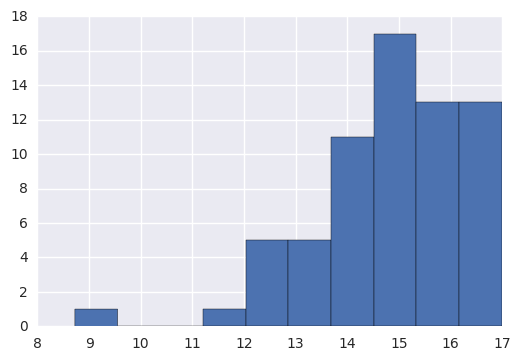

In [253]:
geneSize_nodup.log_size[geneSize_nodup.gene.isin(sigLs)].hist()

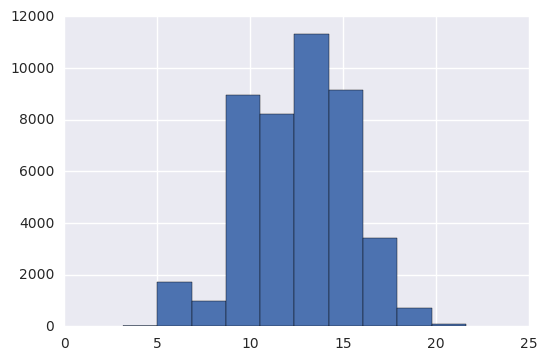

In [199]:
geneSize_nodup.log_size.hist()

In [259]:
geneSize_nodup[geneSize_nodup.gene.str.contains('muc5b')]

,gene,log_size
32227,muc5b,15.056553


In [201]:
sigLs

['braf',
 'muc5b',
 'ufsp2',
 'rp1',
 'esr2',
 'stab1',
 'sh2b3',
 'nsd1',
 'fcgbp',
 'brca2',
 'myh8',
 'itgb4',
 'muc5ac',
 'ubr5',
 'loxl1',
 'taf1c',
 'cep152',
 'fgfr1',
 'polr1a',
 'ano5',
 'hist1h4k',
 'khnyn',
 'csde1',
 'lvrn',
 'gigyf2',
 'itpr3',
 'treml2',
 'klk6',
 'dnah2',
 'tarbp2',
 'pofut1',
 'lrrk1',
 'zmynd15',
 'troap',
 'ahnak',
 'heatr5a',
 'lrrc8e',
 'frem3',
 'fgg',
 'srcap',
 'fbxo41',
 'recql4',
 'ssfa2',
 'nutm1',
 'mbip',
 'fasn',
 'c2orf71',
 'nol8',
 'znf205',
 'pilra',
 'abl1',
 'n4bp2',
 'caskin1',
 'atp11b',
 'phf1',
 'casp1',
 'smarcal1',
 'rasip1',
 'aoc1',
 'bcl9l',
 'spag9',
 'slc9a2',
 'kdm4d',
 'wdr11',
 'krt1',
 'ehhadh',
 'eva1a',
 'ncf4',
 'eef1d',
 'myc',
 'trappc12',
 'ubr1',
 'pcyox1l',
 'nudt12',
 'fam160b2',
 'hapln4',
 'tbc1d15',
 'dnhd1',
 'usp49',
 'tph2']

## scratch

In [ ]:


mSub = df_sub[['MODEL','SAMPLE','SYMBOL','Consequence']]
mSub = mSub.drop_duplicates().dropna()

In [ ]:
synDf = mSub[mSub.Consequence == 'synonymous_variant']
synCnt = synDf.groupby('SYMBOL').MODEL.value_counts().reset_index(name='SynCnt')

synCnt_unstack = synCnt.pivot(index='SYMBOL',columns='MODEL',values='SynCnt').fillna(0)